In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ("output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{weather_url}appid={api_key}&units={units}&q="

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
#WeatherPy shows an output with counts of these categories below. 
#We can loop through each city and append this data to lists, and then get a count and build the data frame
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat =[]
lon =[]
max_temp = []
wind_speed = []

In [4]:
print("Beginning Data Retrieval")
print("__________________________________________")

#loop through cities and grab/append the info
#Very similar to "Ins_OpenWeatherDataFrame" activity
for city in cities:
    response = requests.get(query_url + city)
    
    #ran into a few errors when requesting city data, doing an if statement to remove cities are not found in the request
    if response.ok:
        weather_json = response.json()
        print(city)
        city_name.append(city)
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
       
    #if city is not found in the request, it will return the statement below
    else:
        print("City not found. Skipping...")
print("__________________________________________")
print("Data retrieval complete.")
print("__________________________________________")

#couldn't quite get the 'Record _ of Set _' working correctly

Beginning Data Retrieval
__________________________________________
City not found. Skipping...
jamestown
leningradskiy
buraydah
kapaa
ust-karsk
rikitea
saskylakh
stokmarknes
hobart
ushuaia
mataura
sao fidelis
chitral
busselton
butaritari
City not found. Skipping...
landeck
yellowknife
mackay
tasiilaq
kruisfontein
mar del plata
lorengau
lima
punta arenas
saint-philippe
faanui
jember
vaini
torbay
esperance
arraial do cabo
hermanus
tual
hithadhoo
bethel
City not found. Skipping...
cape town
City not found. Skipping...
ahipara
new norfolk
solhan
bambous virieux
labytnangi
port alfred
City not found. Skipping...
carutapera
hasaki
City not found. Skipping...
san patricio
magistralnyy
ribeira grande
pangnirtung
tsiroanomandidy
poum
sam chuk
tshikapa
rostov
City not found. Skipping...
sawakin
margate
lompoc
la mesa
georgetown
longyearbyen
aksum
fukue
taybad
shalya
nirgua
bredasdorp
hervey bay
norman wells
camabatela
port lincoln
puerto ayora
City not found. Skipping...
te anau
emerald
carnarv

In [5]:
#return the appended data from above as a data frame

city_info = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lon": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

city_info_df = pd.DataFrame(city_info)
city_info_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lon           552
Max Temp      552
Wind Speed    552
dtype: int64

In [6]:
#write the above data frame to a csv file and output the first 5 rows
city_info_df.to_csv("cities.csv")
city_info_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,jamestown,84,AU,1564277687,45,-33.21,138.60,18.98,6.71
1,leningradskiy,93,RU,1564277687,85,69.38,178.42,6.76,7.77
2,buraydah,0,SA,1564277687,30,26.33,43.97,30.00,1.00
3,kapaa,75,US,1564277688,74,22.08,-159.32,31.00,6.70
4,ust-karsk,100,RU,1564277688,98,52.71,118.82,15.08,3.86


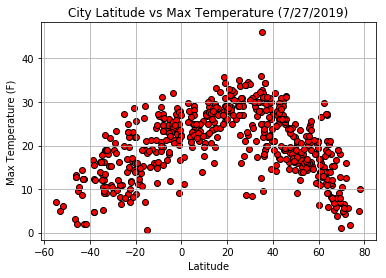

In [7]:
#plot the required plots and save each graph as a .png

plt.scatter(city_info["Lat"],city_info["Max Temp"], marker = "o", facecolors = "red", edgecolors ="black")
plt.title("City Latitude vs Max Temperature (7/27/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("lat_vs_maxtemp.png")

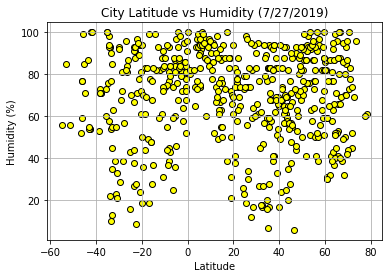

In [8]:
plt.scatter(city_info["Lat"],city_info["Humidity"], marker = "o", facecolors = "yellow", edgecolors ="black")
plt.title("City Latitude vs Humidity (7/27/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("lat_vs_humidity.png")

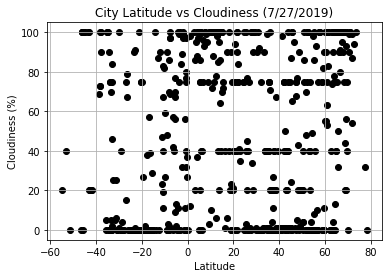

In [9]:
plt.scatter(city_info["Lat"],city_info["Cloudiness"], marker = "o", facecolors = "black", edgecolors ="black")
plt.title("City Latitude vs Cloudiness (7/27/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("lat_vs_cloudiness.png")

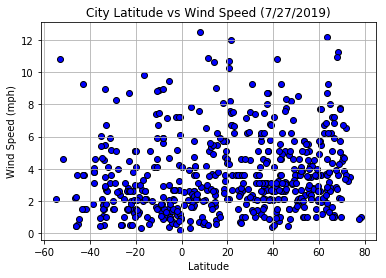

In [10]:
plt.scatter(city_info["Lat"],city_info["Wind Speed"], marker = "o", facecolors = "blue", edgecolors ="black")
plt.title("City Latitude vs Wind Speed (7/27/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("lat_vs_windspeed.png")